In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Bad key savefig.frameon in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matp

In [2]:
ultimate_data= pd.read_csv('ultimate_cleansed.csv')

In [3]:
ultimate_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


## Retention calculation

Retention can be calculated by considering the last trip date of the riders. If the last trip date is within 30 days, then we can consider the rider to be retained.

In [4]:
ultimate_data['last_trip_date'].min()

'2014-01-01'

In [5]:
ultimate_data['last_trip_date'].max()

'2014-07-01'

We can assume that the data was pulled till July 1st. Considering this, the number of riders who have taken a ride in the month of June can be tagged as retained.

In [6]:
ultimate_data['last_trip_date'].describe()

count          50000
unique           182
top       2014-06-29
freq            2036
Name: last_trip_date, dtype: object

the last trip date needs to be converted to date format.

In [7]:
ultimate_data['retained'] =0
ultimate_data.loc[ultimate_data['last_trip_date'] > '2014-06-01', 'retained']=1

In [8]:
ultimate_data['retained'].describe()

count    50000.00000
mean         0.36620
std          0.48177
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: retained, dtype: float64

The mean answers the percentage of user retention.

We are able to retain 36.6% of the total users.

## Pre processing

Before we start training the model, let's check if any of the variables require some pre processing

In [9]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
 12  retained                50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


City and Phone OS are categorical variables and can be one hot encoded.
The remaining are continuous variables and need to be categorized.

In [10]:
City = pd.get_dummies(ultimate_data['city'], prefix ='city')
Phone = pd.get_dummies(ultimate_data['phone'], prefix = 'OS_')

In [11]:
ultimate_data_encoded = pd.concat([ultimate_data.drop(['city', 'phone'], axis=1),City, Phone], axis = 1)

In [12]:
ultimate_data_encoded.sample(10)

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,OS__Android,OS__iPhone
32257,1,2014-01-27,4.601559,1.00,2014-01-27,0.0,False,100.0,4.41,3.0,0,1,0,0,1,0
25779,1,2014-01-20,4.900000,1.00,2014-06-21,0.0,False,71.4,3.45,4.9,1,0,0,1,0,1
17203,2,2014-01-07,5.000000,1.15,2014-06-27,15.4,False,84.6,6.48,4.9,1,0,1,0,0,1
41246,1,2014-01-18,5.000000,1.00,2014-01-21,0.0,False,100.0,14.65,5.0,0,0,0,1,0,1
31228,0,2014-01-09,4.500000,1.00,2014-05-27,0.0,False,100.0,14.23,5.0,0,0,1,0,0,1
16941,9,2014-01-24,4.500000,1.02,2014-06-28,8.3,False,33.3,4.33,4.8,1,0,0,1,0,1
25968,2,2014-01-16,5.000000,1.00,2014-05-05,0.0,False,100.0,9.58,5.0,0,1,0,0,1,0
42388,2,2014-01-14,3.000000,1.00,2014-01-23,0.0,False,100.0,0.68,5.0,0,1,0,0,1,0
49530,1,2014-01-05,1.000000,1.00,2014-01-05,0.0,False,0.0,5.79,5.0,0,0,0,1,0,1
48416,17,2014-01-21,4.800000,1.02,2014-06-15,4.3,False,57.4,3.93,4.8,1,0,0,1,0,1


In [13]:
ultimate_data_encoded.trips_in_first_30_days.describe()

count    50000.000000
mean         2.278200
std          3.792684
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

<AxesSubplot:>

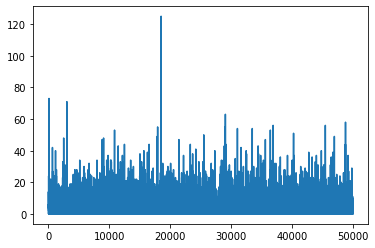

In [14]:
ultimate_data_encoded['trips_in_first_30_days'].plot()

In [15]:
def days(a):
    if a<10:
        return 'Less than 10'
    elif a<20:
        return '10 to 20'
    elif a<=30:
        return '10 to 30'
    else:
        return 'More than 30'

In [16]:
ultimate_data_encoded['Number_of_trips'] = ultimate_data_encoded['trips_in_first_30_days'].apply(lambda a: days(a))

In [17]:
ultimate_data_encoded.sample(10)

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,OS__Android,OS__iPhone,Number_of_trips
12397,0,2014-01-24,5.000000,2.38,2014-04-12,50.0,False,0.0,4.17,4.5,0,1,0,0,0,1,Less than 10
41232,6,2014-01-17,4.800000,1.00,2014-01-20,0.0,False,0.0,2.16,4.7,0,0,0,1,1,0,Less than 10
49499,2,2014-01-12,4.500000,1.00,2014-01-20,0.0,False,0.0,2.30,5.0,0,1,0,0,1,0,Less than 10
13695,2,2014-01-30,4.601559,1.63,2014-04-15,25.0,False,100.0,3.54,4.8,0,1,0,0,0,1,Less than 10
39200,0,2014-01-14,5.000000,1.75,2014-07-01,100.0,False,100.0,3.47,5.0,1,0,1,0,0,1,Less than 10
45035,0,2014-01-31,4.601559,1.75,2014-06-18,100.0,False,100.0,7.94,5.0,1,1,0,0,1,0,Less than 10
35797,6,2014-01-13,5.000000,1.09,2014-06-20,12.5,True,59.4,3.01,4.6,1,0,1,0,0,1,Less than 10
25233,2,2014-01-21,4.700000,1.04,2014-03-20,12.5,True,79.2,3.69,4.6,0,1,0,0,0,1,Less than 10
38367,2,2014-01-26,5.000000,1.56,2014-05-08,50.0,False,25.0,7.88,5.0,0,1,0,0,1,0,Less than 10
13060,2,2014-01-12,5.000000,1.00,2014-06-29,0.0,False,28.6,8.96,5.0,1,0,1,0,0,1,Less than 10


In [18]:
ultimate_data_encoded['avg_rating_of_driver'] = round(ultimate_data_encoded['avg_rating_of_driver'])

In [19]:
ultimate_data_encoded['avg_rating_by_driver'] = round(ultimate_data_encoded['avg_rating_by_driver'])

In [20]:
ultimate_data_encoded['avg_surge'] = round(ultimate_data_encoded['avg_surge'])

In [21]:
def surge(a):
    if a<20:
        return 'Less_than_20'
    elif a<40:
        return '20-40'
    elif a<60:
        return '40-60'
    elif a <80:
        return '60-80'
    else:
        return 'over_80'

In [22]:
def distance(a):
    if a<10:
        x = 'Less_than_10'
    elif a<20:
        x = '10-20'
    elif a<30:
        x = '20-30'
    elif a<40:
        x = '30-40'
    elif a<50:
        x = '40-50'
    else:
        x = 'Greater_than_50'
    return x

In [23]:
def month(last_trip_date):
    if last_trip_date <= '2014-01-31':
        month ='Jan'
    elif last_trip_date < '2014-03-01':
        month = 'Feb'
    elif last_trip_date <= '2014-03-31':
        month = 'Mar'
    elif last_trip_date <= '2014-04-30':
        month = 'Apr'
    elif last_trip_date <= '2014-05-31':
        month = 'May'
    elif last_trip_date <= '2014-06-30':
        month = 'Jun'
    else:
        month ='Jul'
    return month

In [24]:
def signup(signup_date):
    if signup_date <= '2014-01-10':
        signup ='first_10_days_Jan'
    elif signup_date < '2014-01-20':
        signup = '10th-20th_Jan'
    else:
        signup ='last_10_days_Jan'
    return signup

In [25]:
def weekday(weekday_pct):
    if weekday_pct ==0:
        Usage = 'Only_during_weekends'
    elif weekday_pct ==100:
        Usage = 'Only_during_weekdays'
    elif weekday_pct <=25:
        Usage = 'Mostly_during_weekends'
    elif weekday_pct <=75:
        Usage = 'Both_weekdays_and_weekends'
    else:
        Usage = 'Mostly_during_weekdays'
    return Usage

In [26]:
ultimate_data_encoded['Usage'] = ultimate_data_encoded['weekday_pct'].apply(lambda a: weekday(a))


In [27]:
ultimate_data_encoded['signup'] = ultimate_data_encoded['signup_date'].apply(lambda a: signup(a))
ultimate_data_encoded['last_trip_month'] = ultimate_data_encoded['last_trip_date'].apply(lambda a: month(a))
ultimate_data_encoded['distance_buckets'] = ultimate_data_encoded['avg_dist'].apply(lambda a: distance(a))
ultimate_data_encoded['Surge_percentage'] = ultimate_data_encoded['surge_pct'].apply(lambda a: surge(a))

In [28]:
ultimate_data_encoded.sample(10)

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,...,city_King's Landing,city_Winterfell,OS__Android,OS__iPhone,Number_of_trips,Usage,signup,last_trip_month,distance_buckets,Surge_percentage
19680,3,2014-01-29,5.0,1.0,2014-02-15,0.0,False,33.3,2.93,5.0,...,0,1,0,1,Less than 10,Both_weekdays_and_weekends,last_10_days_Jan,Feb,Less_than_10,Less_than_20
12546,0,2014-01-25,5.0,1.0,2014-04-20,0.0,False,0.0,1.60,5.0,...,0,1,0,1,Less than 10,Only_during_weekends,last_10_days_Jan,Apr,Less_than_10,Less_than_20
19711,1,2014-01-25,5.0,1.0,2014-01-30,0.0,True,100.0,1.46,5.0,...,0,1,0,1,Less than 10,Only_during_weekdays,last_10_days_Jan,Jan,Less_than_10,Less_than_20
13407,6,2014-01-31,5.0,1.0,2014-06-27,2.1,True,72.3,2.45,5.0,...,0,1,0,1,Less than 10,Both_weekdays_and_weekends,last_10_days_Jan,Jun,Less_than_10,Less_than_20
23982,0,2014-01-18,4.0,1.0,2014-04-19,0.0,True,33.3,3.40,5.0,...,0,1,0,1,Less than 10,Both_weekdays_and_weekends,10th-20th_Jan,Apr,Less_than_10,Less_than_20
15504,0,2014-01-10,5.0,1.0,2014-05-08,0.0,False,100.0,6.78,5.0,...,0,1,1,0,Less than 10,Only_during_weekdays,first_10_days_Jan,May,Less_than_10,Less_than_20
22644,2,2014-01-10,4.0,1.0,2014-04-08,0.0,True,75.0,5.51,5.0,...,0,1,0,1,Less than 10,Both_weekdays_and_weekends,first_10_days_Jan,Apr,Less_than_10,Less_than_20
5943,0,2014-01-25,5.0,1.0,2014-04-10,0.0,False,100.0,2.86,5.0,...,0,0,0,1,Less than 10,Only_during_weekdays,last_10_days_Jan,Apr,Less_than_10,Less_than_20
40177,1,2014-01-30,4.0,1.0,2014-02-07,0.0,False,100.0,12.35,5.0,...,0,0,0,1,Less than 10,Only_during_weekdays,last_10_days_Jan,Feb,10-20,Less_than_20
41792,1,2014-01-15,5.0,1.0,2014-04-09,0.0,True,50.0,4.64,5.0,...,0,0,1,0,Less than 10,Both_weekdays_and_weekends,10th-20th_Jan,Apr,Less_than_10,Less_than_20


In [29]:
signup = pd.get_dummies(ultimate_data_encoded['signup'], prefix ='Signup')

In [30]:
last_trip_month = pd.get_dummies(ultimate_data_encoded['last_trip_month'], prefix ='Last_trip')

In [31]:
distance_buckets = pd.get_dummies(ultimate_data_encoded['distance_buckets'], prefix = 'Distance')

In [32]:
surge_percentage = pd.get_dummies(ultimate_data_encoded['Surge_percentage'], prefix = 'Surge')

In [33]:
Number_of_trips = pd.get_dummies(ultimate_data_encoded['Number_of_trips'], prefix = 'Trips')

In [34]:
Usage = pd.get_dummies(ultimate_data_encoded['Usage'], prefix ='Usage')

In [35]:
Average_rating_by_driver = pd.get_dummies(ultimate_data_encoded['avg_rating_by_driver'], prefix = 'Rating_by_driver')
Average_rating_of_driver = pd.get_dummies(ultimate_data_encoded['avg_rating_of_driver'], prefix = 'Rating_of_driver')
Average_surge = pd.get_dummies(ultimate_data_encoded['avg_surge'], prefix = 'avg_surge')

In [37]:
ultimate_data_modelling = pd.concat([ultimate_data_encoded.drop(['avg_surge','distance_buckets','signup_date','signup','surge_pct','last_trip_month','last_trip_date', 'avg_dist', 'Number_of_trips', 'trips_in_first_30_days', 'avg_rating_by_driver', 'avg_rating_of_driver','Usage','weekday_pct', 'Surge_percentage' ], axis=1), signup,last_trip_month, distance_buckets,surge_percentage,Number_of_trips, Average_rating_by_driver,Average_rating_of_driver,Usage,Average_surge  ], axis =1) 

In [38]:
ultimate_data_modelling.sample(10)

,ultimate_black_user,retained,city_Astapor,city_King's Landing,city_Winterfell,OS__Android,OS__iPhone,Signup_10th-20th_Jan,Signup_first_10_days_Jan,Signup_last_10_days_Jan,...,Usage_Mostly_during_weekends,Usage_Only_during_weekdays,Usage_Only_during_weekends,avg_surge_1.0,avg_surge_2.0,avg_surge_3.0,avg_surge_4.0,avg_surge_5.0,avg_surge_6.0,avg_surge_8.0
43907,False,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
30377,False,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
32986,True,0,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
6852,False,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
14396,True,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
32510,False,0,1,0,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
37012,False,0,1,0,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
29698,True,0,0,0,1,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
46083,False,0,0,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0
17039,False,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [40]:
ultimate_data_modelling['ultimate_black_user'].replace({True:1, False:0}, inplace=True)

In [42]:
ultimate_data_modelling.sample(10)

,ultimate_black_user,retained,city_Astapor,city_King's Landing,city_Winterfell,OS__Android,OS__iPhone,Signup_10th-20th_Jan,Signup_first_10_days_Jan,Signup_last_10_days_Jan,...,Usage_Mostly_during_weekends,Usage_Only_during_weekdays,Usage_Only_during_weekends,avg_surge_1.0,avg_surge_2.0,avg_surge_3.0,avg_surge_4.0,avg_surge_5.0,avg_surge_6.0,avg_surge_8.0
7602,0,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
31689,0,0,0,0,1,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0
2337,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
10892,1,1,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
22510,0,0,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
18875,0,0,1,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0
3944,0,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
27574,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
12165,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6689,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
ultimate_data_modelling.columns

Index(['ultimate_black_user', 'retained', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'OS__Android', 'OS__iPhone',
       'Signup_10th-20th_Jan', 'Signup_first_10_days_Jan',
       'Signup_last_10_days_Jan', 'Last_trip_Apr', 'Last_trip_Feb',
       'Last_trip_Jan', 'Last_trip_Jul', 'Last_trip_Jun', 'Last_trip_Mar',
       'Last_trip_May', 'Distance_10-20', 'Distance_20-30', 'Distance_30-40',
       'Distance_40-50', 'Distance_Greater_than_50', 'Distance_Less_than_10',
       'Surge_20-40', 'Surge_40-60', 'Surge_60-80', 'Surge_Less_than_20',
       'Surge_over_80', 'Trips_10 to 20', 'Trips_10 to 30',
       'Trips_Less than 10', 'Trips_More than 30', 'Rating_by_driver_1.0',
       'Rating_by_driver_2.0', 'Rating_by_driver_3.0', 'Rating_by_driver_4.0',
       'Rating_by_driver_5.0', 'Rating_of_driver_1.0', 'Rating_of_driver_2.0',
       'Rating_of_driver_3.0', 'Rating_of_driver_4.0', 'Rating_of_driver_5.0',
       'Usage_Both_weekdays_and_weekends', 'Usage_Mostly_dur

In [47]:
ultimate_data_modelling.to_csv('ultimate_data_modelling_retain.csv', index =False)

## Model Training

Training the Random forest model to predict the retained/churned customers.

We are choosing ROC-AUC as the measure of model performance.

In [44]:
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [45]:
X = ultimate_data_modelling.drop('retained', axis=1)
y= ultimate_data_modelling['retained']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [ ]:
estimators = [100,150,200,250]
features =[10,20,30,40,50]
rfc = RandomForestClassifier()
grid_Search = GridSearchCV(rfc, param_grid = {'n_estimators': estimators, 'max_features' : features}, scoring = 'roc_auc')
rfc_model = grid_Search.fit(X_train, y_train)

In [57]:
print(rfc_model.best_params_,rfc_model.best_score_)

{'max_features': 10, 'n_estimators': 200} 0.988857142857143


In [52]:
rfc_test = RandomForestClassifier(max_features =10, n_estimators =250)

In [53]:
rfc_test_fit = rfc_test.fit(X_train, y_train)

In [55]:
accuracy_score(rfc_test.predict(X_test), y_test)

0.9893333333333333

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,roc_auc_score

classification_report(rfc_model.predict(X_train), y_train)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99     21947\n           1       1.00      0.98      0.99     13053\n\n    accuracy                           0.99     35000\n   macro avg       0.99      0.99      0.99     35000\nweighted avg       0.99      0.99      0.99     35000\n'

In [43]:
roc_auc_score(rfc_model.predict(X_train), y_train)

0.9900270911315707

In [44]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [45]:
accuracy_score(rfc_model.predict(X_train), y_train)

0.9924571428571428

In [46]:
recall_score(rfc_model.predict(X_train), y_train)

0.9804642610894048

In [47]:
precision_score(rfc_model.predict(X_train), y_train)

0.9992972593113141